image no: 0 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_001_WellC4_Channel   BF  _Seq0005.tif
horizontal inner distance between rois: 192.0 (microns)
vertical thickness at inner edge of left ROI : 393.6 (microns)
vertical thickness at midpoint between rois: 656.4 (microns)
vertical thickness at inner edge of right ROI : 469.2 (microns)
area between rois: 66115.2 (microns)


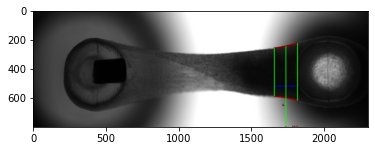


image no: 1 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellB6_Channel   BF  _Seq0016.tif
horizontal inner distance between rois: 103.2 (microns)
vertical thickness at inner edge of left ROI : 394.8 (microns)
vertical thickness at midpoint between rois: 420.0 (microns)
vertical thickness at inner edge of right ROI : 444.0 (microns)
area between rois: 34630.8 (microns)


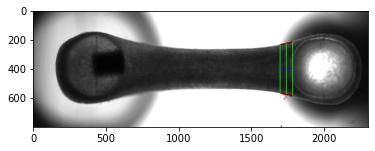


image no: 2 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellB4_Channel   BF  _Seq0031.tif
horizontal inner distance between rois: 1357.2 (microns)
vertical thickness at inner edge of left ROI : 490.8 (microns)
vertical thickness at midpoint between rois: 358.8 (microns)
vertical thickness at inner edge of right ROI : 535.2 (microns)
area between rois: 445560.0 (microns)


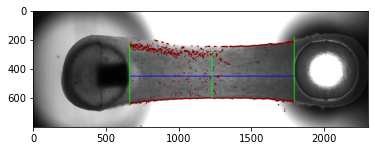


image no: 3 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_003_WellB6_Channel   BF  _Seq0025.tif
horizontal inner distance between rois: 22.8 (microns)
vertical thickness at inner edge of left ROI : 476.4 (microns)
vertical thickness at midpoint between rois: 480.0 (microns)
vertical thickness at inner edge of right ROI : 486.0 (microns)
area between rois: 9122.4 (microns)


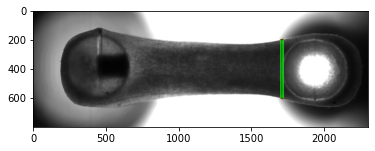


image no: 4 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellC2_Channel   BF  _Seq0011.tif
horizontal inner distance between rois: 108.0 (microns)
vertical thickness at inner edge of left ROI : 368.4 (microns)
vertical thickness at midpoint between rois: 394.8 (microns)
vertical thickness at inner edge of right ROI : 427.2 (microns)
area between rois: 35785.2 (microns)


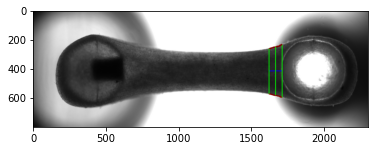


image no: 5 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellA2_Channel   BF  _Seq0009.tif
horizontal inner distance between rois: 100.8 (microns)
vertical thickness at inner edge of left ROI : 376.8 (microns)
vertical thickness at midpoint between rois: 393.6 (microns)
vertical thickness at inner edge of right ROI : 421.2 (microns)
area between rois: 33117.6 (microns)


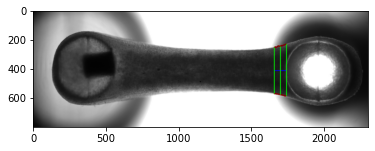


image no: 6 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_003_WellC6_Channel   BF  _Seq0026.tif
horizontal inner distance between rois: 18.0 (microns)
vertical thickness at inner edge of left ROI : 474.0 (microns)
vertical thickness at midpoint between rois: 471.6 (microns)
vertical thickness at inner edge of right ROI : 476.4 (microns)
area between rois: 7099.2 (microns)


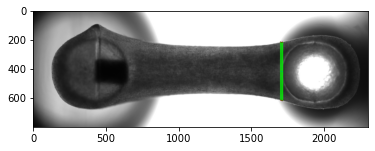


image no: 7 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellB6_Channel   BF  _Seq0034.tif
horizontal inner distance between rois: 1315.2 (microns)
vertical thickness at inner edge of left ROI : 534.0 (microns)
vertical thickness at midpoint between rois: 408.0 (microns)
vertical thickness at inner edge of right ROI : 498.0 (microns)
area between rois: 476352.0 (microns)


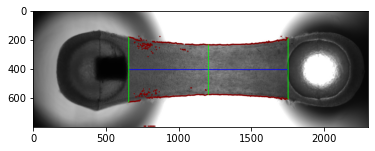


image no: 8 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_003_WellA2_Channel   BF  _Seq0018.tif
horizontal inner distance between rois: 1425.6 (microns)
vertical thickness at inner edge of left ROI : 19.2 (microns)
vertical thickness at midpoint between rois: 432.0 (microns)
vertical thickness at inner edge of right ROI : 106.8 (microns)
area between rois: 492840.0 (microns)


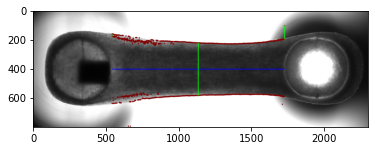


image no: 9 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellB2_Channel   BF  _Seq0010.tif
horizontal inner distance between rois: 86.4 (microns)
vertical thickness at inner edge of left ROI : 392.4 (microns)
vertical thickness at midpoint between rois: 411.6 (microns)
vertical thickness at inner edge of right ROI : 433.2 (microns)
area between rois: 29713.2 (microns)


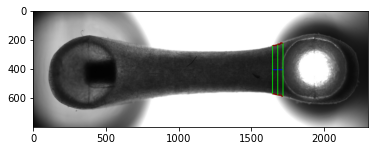


image no: 10 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellB4_Channel   BF  _Seq0013.tif
horizontal inner distance between rois: 172.8 (microns)
vertical thickness at inner edge of left ROI : 355.2 (microns)
vertical thickness at midpoint between rois: 392.4 (microns)
vertical thickness at inner edge of right ROI : 434.4 (microns)
area between rois: 50385.6 (microns)


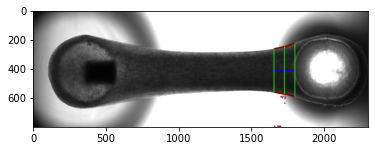


image no: 11 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_001_WellB2_Channel   BF  _Seq0001.tif
horizontal inner distance between rois: 1545.6 (microns)
vertical thickness at inner edge of left ROI : 489.6 (microns)
vertical thickness at midpoint between rois: 108.0 (microns)
vertical thickness at inner edge of right ROI : 486.0 (microns)
area between rois: 300318.0 (microns)


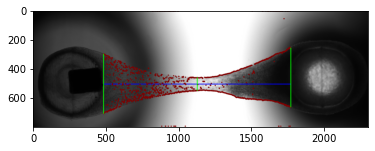


image no: 12 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_001_WellC6_Channel   BF  _Seq0008.tif
horizontal inner distance between rois: 284.4 (microns)
vertical thickness at inner edge of left ROI : 388.8 (microns)
vertical thickness at midpoint between rois: 420.0 (microns)
vertical thickness at inner edge of right ROI : 480.0 (microns)
area between rois: 99598.8 (microns)


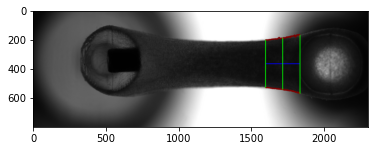


image no: 13 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellA2_Channel   BF  _Seq0027.tif
horizontal inner distance between rois: 1495.2 (microns)
vertical thickness at inner edge of left ROI : 550.8 (microns)
vertical thickness at midpoint between rois: 438.0 (microns)
vertical thickness at inner edge of right ROI : 495.6 (microns)
area between rois: 561846.0 (microns)


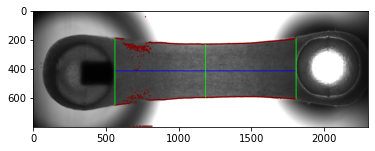


image no: 14 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_003_WellC4_Channel   BF  _Seq0023.tif
horizontal inner distance between rois: 175.2 (microns)
vertical thickness at inner edge of left ROI : 411.6 (microns)
vertical thickness at midpoint between rois: 436.8 (microns)
vertical thickness at inner edge of right ROI : 470.4 (microns)
area between rois: 64033.2 (microns)


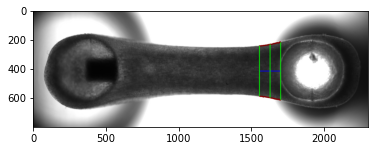


image no: 15 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_001_WellA6_Channel   BF  _Seq0006.tif
horizontal inner distance between rois: 506.4 (microns)
vertical thickness at inner edge of left ROI : 382.8 (microns)
vertical thickness at midpoint between rois: 396.0 (microns)
vertical thickness at inner edge of right ROI : 459.6 (microns)
area between rois: 167906.4 (microns)


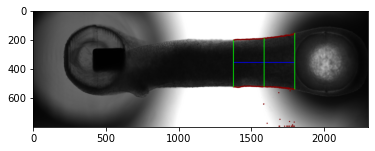


image no: 16 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_003_WellA4_Channel   BF  _Seq0021.tif
horizontal inner distance between rois: 1.2 (microns)
vertical thickness at inner edge of left ROI : 526.8 (microns)
vertical thickness at midpoint between rois: 526.8 (microns)
vertical thickness at inner edge of right ROI : 526.8 (microns)
area between rois: 526.8 (microns)


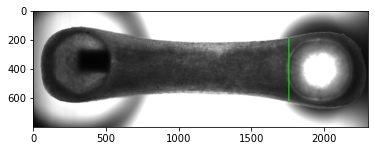


image no: 17 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_003_WellB2_Channel   BF  _Seq0019.tif
horizontal inner distance between rois: 256.8 (microns)
vertical thickness at inner edge of left ROI : 396.0 (microns)
vertical thickness at midpoint between rois: 426.0 (microns)
vertical thickness at inner edge of right ROI : 471.6 (microns)
area between rois: 89581.2 (microns)


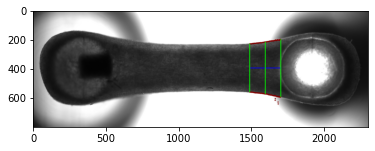


image no: 18 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellC4_Channel   BF  _Seq0014.tif
horizontal inner distance between rois: 129.6 (microns)
vertical thickness at inner edge of left ROI : 380.4 (microns)
vertical thickness at midpoint between rois: 405.6 (microns)
vertical thickness at inner edge of right ROI : 436.8 (microns)
area between rois: 43633.2 (microns)


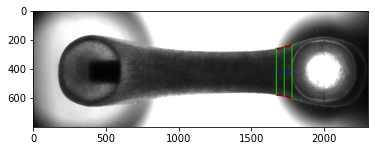


image no: 19 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellC6_Channel   BF  _Seq0017.tif
horizontal inner distance between rois: 120.0 (microns)
vertical thickness at inner edge of left ROI : 396.0 (microns)
vertical thickness at midpoint between rois: 418.8 (microns)
vertical thickness at inner edge of right ROI : 450.0 (microns)
area between rois: 42098.4 (microns)


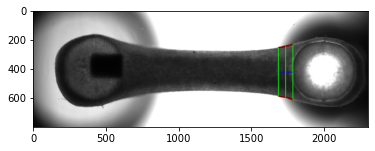


image no: 20 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_003_WellB4_Channel   BF  _Seq0022.tif
horizontal inner distance between rois: 728.4 (microns)
vertical thickness at inner edge of left ROI : 385.2 (microns)
vertical thickness at midpoint between rois: 397.2 (microns)
vertical thickness at inner edge of right ROI : 510.0 (microns)
area between rois: 249700.8 (microns)


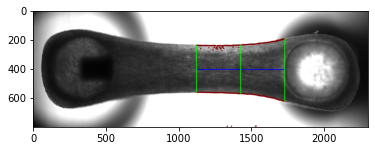


image no: 21 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellA4_Channel   BF  _Seq0030.tif
horizontal inner distance between rois: 1420.8 (microns)
vertical thickness at inner edge of left ROI : 525.6 (microns)
vertical thickness at midpoint between rois: 421.2 (microns)
vertical thickness at inner edge of right ROI : 486.0 (microns)
area between rois: 500535.6 (microns)


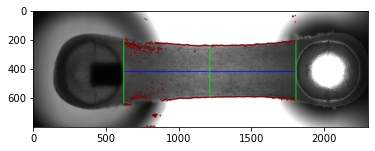


image no: 22 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellB2_Channel   BF  _Seq0028.tif
horizontal inner distance between rois: 1362.0 (microns)
vertical thickness at inner edge of left ROI : 532.8 (microns)
vertical thickness at midpoint between rois: 409.2 (microns)
vertical thickness at inner edge of right ROI : 493.2 (microns)
area between rois: 491512.8 (microns)


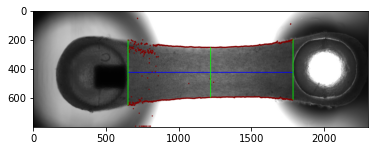


image no: 23 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_003_WellA6_Channel   BF  _Seq0024.tif
horizontal inner distance between rois: 14.4 (microns)
vertical thickness at inner edge of left ROI : 484.8 (microns)
vertical thickness at midpoint between rois: 486.0 (microns)
vertical thickness at inner edge of right ROI : 490.8 (microns)
area between rois: 5847.6 (microns)


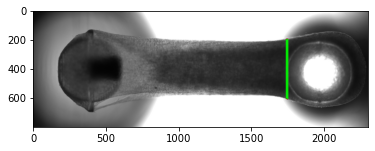


image no: 24 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_001_WellB4_Channel   BF  _Seq0004.tif
horizontal inner distance between rois: 343.2 (microns)
vertical thickness at inner edge of left ROI : 403.2 (microns)
vertical thickness at midpoint between rois: 410.4 (microns)
vertical thickness at inner edge of right ROI : 469.2 (microns)
area between rois: 117952.8 (microns)


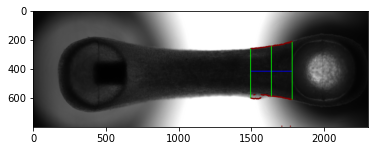


image no: 25 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellA4_Channel   BF  _Seq0012.tif
horizontal inner distance between rois: 152.4 (microns)
vertical thickness at inner edge of left ROI : 357.6 (microns)
vertical thickness at midpoint between rois: 102.0 (microns)
vertical thickness at inner edge of right ROI : 432.0 (microns)
area between rois: 49566.0 (microns)


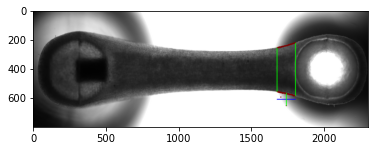


image no: 26 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_005_WellA4_Channel   BF  _Seq0039.tif
horizontal inner distance between rois: 1357.2 (microns)
vertical thickness at inner edge of left ROI : 447.6 (microns)
vertical thickness at midpoint between rois: 330.0 (microns)
vertical thickness at inner edge of right ROI : 447.6 (microns)
area between rois: 377629.2 (microns)


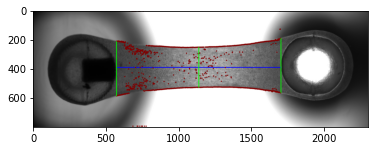


image no: 27 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_001_WellB6_Channel   BF  _Seq0007.tif
horizontal inner distance between rois: 304.8 (microns)
vertical thickness at inner edge of left ROI : 379.2 (microns)
vertical thickness at midpoint between rois: 405.6 (microns)
vertical thickness at inner edge of right ROI : 756.0 (microns)
area between rois: 107236.8 (microns)


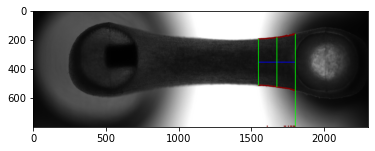


image no: 28 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_005_WellC2_Channel   BF  _Seq0038.tif
horizontal inner distance between rois: 1177.2 (microns)
vertical thickness at inner edge of left ROI : 200.4 (microns)
vertical thickness at midpoint between rois: 346.8 (microns)
vertical thickness at inner edge of right ROI : 444.0 (microns)
area between rois: 343171.2 (microns)


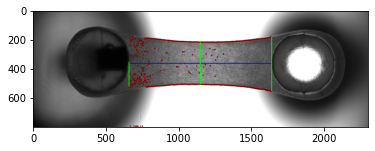


image no: 29 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_005_WellB6_Channel   BF  _Seq0043.tif
horizontal inner distance between rois: 1332.0 (microns)
vertical thickness at inner edge of left ROI : 24.0 (microns)
vertical thickness at midpoint between rois: 327.6 (microns)
vertical thickness at inner edge of right ROI : 709.2 (microns)
area between rois: 336096.0 (microns)


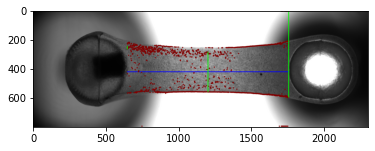


image no: 30 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_006_WellB2_Channel   BF  _Seq0046.tif
horizontal inner distance between rois: 124.8 (microns)
vertical thickness at inner edge of left ROI : 752.4 (microns)
vertical thickness at midpoint between rois: 570.0 (microns)
vertical thickness at inner edge of right ROI : 182.4 (microns)
area between rois: 63943.2 (microns)


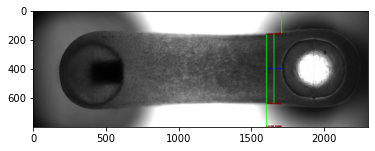


image no: 31 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_005_WellA2_Channel   BF  _Seq0036.tif
horizontal inner distance between rois: 1386.0 (microns)
vertical thickness at inner edge of left ROI : 482.4 (microns)
vertical thickness at midpoint between rois: 390.0 (microns)
vertical thickness at inner edge of right ROI : 472.8 (microns)
area between rois: 464152.8 (microns)


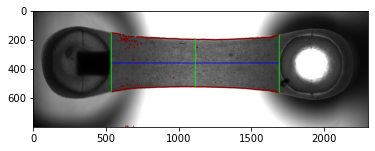


image no: 32 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_006_WellA4_Channel   BF  _Seq0048.tif
horizontal inner distance between rois: 1352.4 (microns)
vertical thickness at inner edge of left ROI : 596.4 (microns)
vertical thickness at midpoint between rois: 26.4 (microns)
vertical thickness at inner edge of right ROI : 552.0 (microns)
area between rois: 529810.8 (microns)


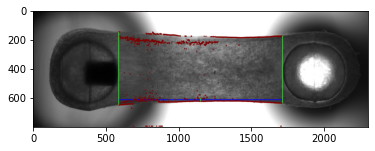


image no: 33 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_005_WellB4_Channel   BF  _Seq0040.tif
horizontal inner distance between rois: 1272.0 (microns)
vertical thickness at inner edge of left ROI : 342.0 (microns)
vertical thickness at midpoint between rois: 346.8 (microns)
vertical thickness at inner edge of right ROI : 32.4 (microns)
area between rois: 376248.0 (microns)


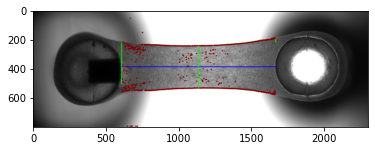


image no: 34 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellC4_Channel   BF  _Seq0032.tif
horizontal inner distance between rois: 1297.2 (microns)
vertical thickness at inner edge of left ROI : 182.4 (microns)
vertical thickness at midpoint between rois: 394.8 (microns)
vertical thickness at inner edge of right ROI : 258.0 (microns)
area between rois: 445612.8 (microns)


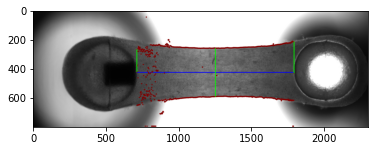


image no: 35 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_005_WellB2_Channel   BF  _Seq0037.tif
horizontal inner distance between rois: 1262.4 (microns)
vertical thickness at inner edge of left ROI : 397.2 (microns)
vertical thickness at midpoint between rois: 367.2 (microns)
vertical thickness at inner edge of right ROI : 451.2 (microns)
area between rois: 394166.4 (microns)


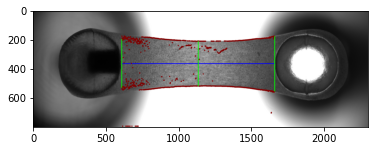


image no: 36 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_006_WellC6_Channel   BF  _Seq0053.tif
horizontal inner distance between rois: 1342.8 (microns)
vertical thickness at inner edge of left ROI : 583.2 (microns)
vertical thickness at midpoint between rois: 426.0 (microns)
vertical thickness at inner edge of right ROI : 559.2 (microns)
area between rois: 525975.6 (microns)


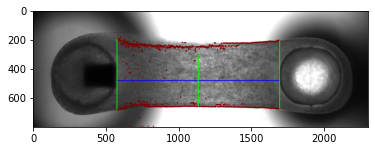


image no: 37 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_006_WellA2_Channel   BF  _Seq0045.tif
horizontal inner distance between rois: 1358.4 (microns)
vertical thickness at inner edge of left ROI : 256.8 (microns)
vertical thickness at midpoint between rois: 446.4 (microns)
vertical thickness at inner edge of right ROI : 212.4 (microns)
area between rois: 471073.2 (microns)


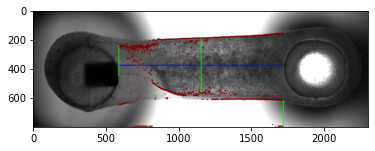


image no: 38 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_006_WellC4_Channel   BF  _Seq0050.tif
horizontal inner distance between rois: 1294.8 (microns)
vertical thickness at inner edge of left ROI : 506.4 (microns)
vertical thickness at midpoint between rois: 206.4 (microns)
vertical thickness at inner edge of right ROI : 565.2 (microns)
area between rois: 491481.6 (microns)


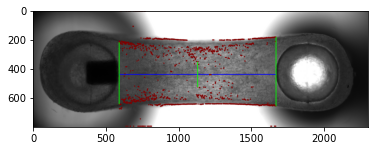


image no: 39 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_005_WellA6_Channel   BF  _Seq0042.tif
horizontal inner distance between rois: 1424.4 (microns)
vertical thickness at inner edge of left ROI : 340.8 (microns)
vertical thickness at midpoint between rois: 339.6 (microns)
vertical thickness at inner edge of right ROI : 465.6 (microns)
area between rois: 380958.0 (microns)


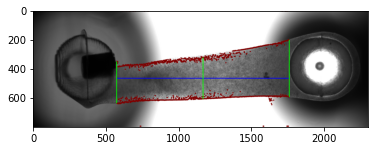


image no: 40 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_006_WellC2_Channel   BF  _Seq0047.tif
horizontal inner distance between rois: 100.8 (microns)
vertical thickness at inner edge of left ROI : 574.8 (microns)
vertical thickness at midpoint between rois: 578.4 (microns)
vertical thickness at inner edge of right ROI : 759.6 (microns)
area between rois: 49027.2 (microns)


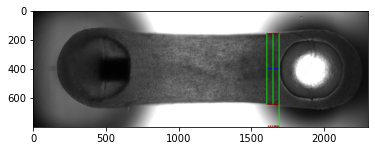


image no: 41 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellC6_Channel   BF  _Seq0035.tif
horizontal inner distance between rois: 1279.2 (microns)
vertical thickness at inner edge of left ROI : 537.6 (microns)
vertical thickness at midpoint between rois: 416.4 (microns)
vertical thickness at inner edge of right ROI : 525.6 (microns)
area between rois: 470806.8 (microns)


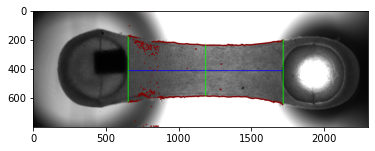


image no: 42 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellA2_Channel   BF  _Seq0055.tif
horizontal inner distance between rois: 55.2 (microns)
vertical thickness at inner edge of left ROI : 22.8 (microns)
vertical thickness at midpoint between rois: 462.0 (microns)
vertical thickness at inner edge of right ROI : 469.2 (microns)
area between rois: 19850.4 (microns)


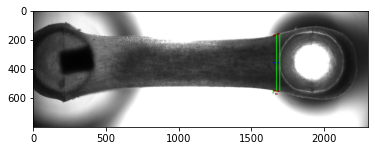


image no: 43 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_005_WellC4_Channel   BF  _Seq0041.tif
horizontal inner distance between rois: 1203.6 (microns)
vertical thickness at inner edge of left ROI : 201.6 (microns)
vertical thickness at midpoint between rois: 214.8 (microns)
vertical thickness at inner edge of right ROI : 440.4 (microns)
area between rois: 328249.2 (microns)


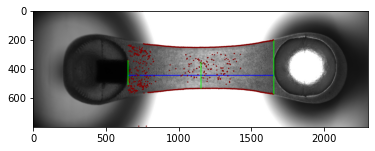


image no: 44 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellB2_Channel   BF  _Seq0056.tif
horizontal inner distance between rois: 13.2 (microns)
vertical thickness at inner edge of left ROI : 448.8 (microns)
vertical thickness at midpoint between rois: 453.6 (microns)
vertical thickness at inner edge of right ROI : 484.8 (microns)
area between rois: 5059.2 (microns)


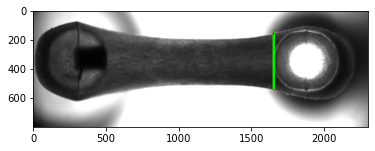


image no: 45 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellA6_Channel   BF  _Seq0063.tif
horizontal inner distance between rois: 1424.4 (microns)
vertical thickness at inner edge of left ROI : 501.6 (microns)
vertical thickness at midpoint between rois: 379.2 (microns)
vertical thickness at inner edge of right ROI : 493.2 (microns)
area between rois: 477656.4 (microns)


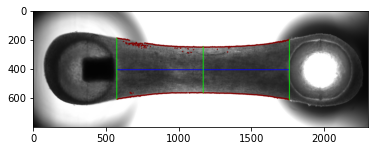


image no: 46 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellC2_Channel   BF  _Seq0029.tif
horizontal inner distance between rois: 1288.8 (microns)
vertical thickness at inner edge of left ROI : 489.6 (microns)
vertical thickness at midpoint between rois: 418.8 (microns)
vertical thickness at inner edge of right ROI : 501.6 (microns)
area between rois: 472062.0 (microns)


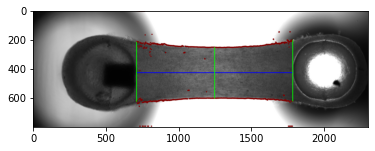


image no: 47 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_001_WellA2_Channel   BF  _Seq0000.tif
horizontal inner distance between rois: 111.6 (microns)
vertical thickness at inner edge of left ROI : 402.0 (microns)
vertical thickness at midpoint between rois: 424.8 (microns)
vertical thickness at inner edge of right ROI : 282.0 (microns)
area between rois: 43870.8 (microns)


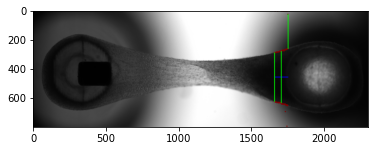


image no: 48 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellB4_Channel   BF  _Seq0061.tif
horizontal inner distance between rois: 1363.2 (microns)
vertical thickness at inner edge of left ROI : 484.8 (microns)
vertical thickness at midpoint between rois: 366.0 (microns)
vertical thickness at inner edge of right ROI : 469.2 (microns)
area between rois: 452479.2 (microns)


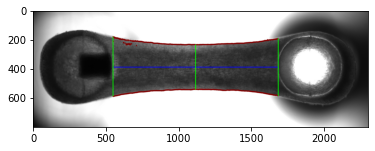


image no: 49 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellC2_Channel   BF  _Seq0059.tif
horizontal inner distance between rois: 8.4 (microns)
vertical thickness at inner edge of left ROI : 453.6 (microns)
vertical thickness at midpoint between rois: 453.6 (microns)
vertical thickness at inner edge of right ROI : 458.4 (microns)
area between rois: 3182.4 (microns)


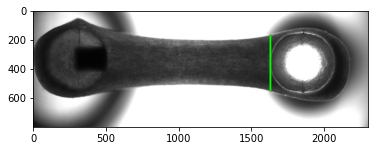


image no: 50 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellC4_Channel   BF  _Seq0062.tif
horizontal inner distance between rois: 230.4 (microns)
vertical thickness at inner edge of left ROI : 391.2 (microns)
vertical thickness at midpoint between rois: 421.2 (microns)
vertical thickness at inner edge of right ROI : 466.8 (microns)
area between rois: 81136.8 (microns)


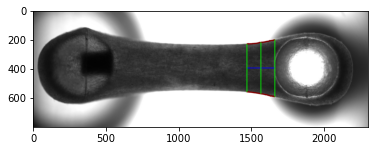


image no: 51 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellB6_Channel   BF  _Seq0064.tif
horizontal inner distance between rois: 1404.0 (microns)
vertical thickness at inner edge of left ROI : 523.2 (microns)
vertical thickness at midpoint between rois: 406.8 (microns)
vertical thickness at inner edge of right ROI : 486.0 (microns)
area between rois: 494422.8 (microns)


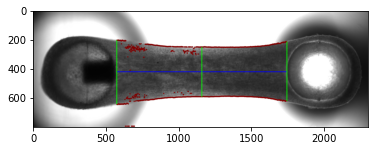


image no: 52 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellC6_Channel   BF  _Seq0065.tif
horizontal inner distance between rois: 1.2 (microns)
vertical thickness at inner edge of left ROI : 483.6 (microns)
vertical thickness at midpoint between rois: 483.6 (microns)
vertical thickness at inner edge of right ROI : 483.6 (microns)
area between rois: 483.6 (microns)


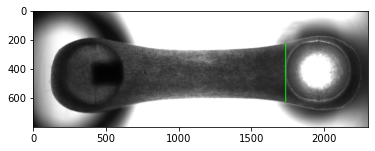


image no: 53 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellA4_Channel   BF  _Seq0072.tif
horizontal inner distance between rois: 75.6 (microns)
vertical thickness at inner edge of left ROI : 448.8 (microns)
vertical thickness at midpoint between rois: 472.8 (microns)
vertical thickness at inner edge of right ROI : 482.4 (microns)
area between rois: 28842.0 (microns)


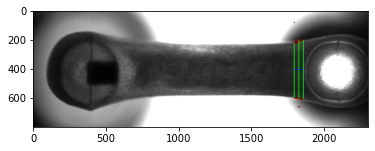


image no: 54 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellB2_Channel   BF  _Seq0068.tif
horizontal inner distance between rois: 1413.6 (microns)
vertical thickness at inner edge of left ROI : 504.0 (microns)
vertical thickness at midpoint between rois: 385.2 (microns)
vertical thickness at inner edge of right ROI : 512.4 (microns)
area between rois: 485786.4 (microns)


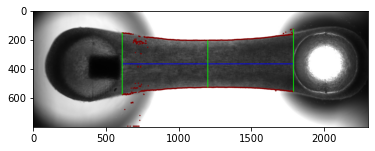


image no: 55 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellA6_Channel   BF  _Seq0075.tif
horizontal inner distance between rois: 1480.8 (microns)
vertical thickness at inner edge of left ROI : 510.0 (microns)
vertical thickness at midpoint between rois: 394.8 (microns)
vertical thickness at inner edge of right ROI : 482.4 (microns)
area between rois: 486406.8 (microns)


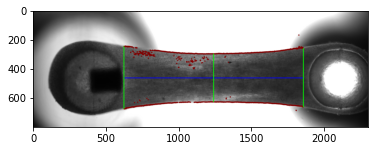


image no: 56 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellB6_Channel   BF  _Seq0076.tif
horizontal inner distance between rois: 104.4 (microns)
vertical thickness at inner edge of left ROI : 469.2 (microns)
vertical thickness at midpoint between rois: 480.0 (microns)
vertical thickness at inner edge of right ROI : 500.4 (microns)
area between rois: 42108.0 (microns)


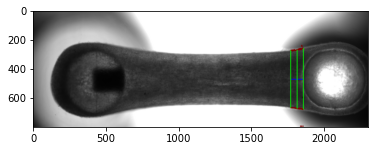


image no: 57 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellC1_Channel   BF  _Seq0070.tif
horizontal inner distance between rois: 124.8 (microns)
vertical thickness at inner edge of left ROI : 430.8 (microns)
vertical thickness at midpoint between rois: 447.6 (microns)
vertical thickness at inner edge of right ROI : 463.2 (microns)
area between rois: 45948.0 (microns)


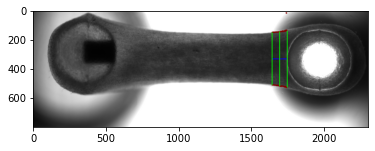


image no: 58 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellC2_Channel   BF  _Seq0071.tif
horizontal inner distance between rois: 1389.6 (microns)
vertical thickness at inner edge of left ROI : 337.2 (microns)
vertical thickness at midpoint between rois: 380.4 (microns)
vertical thickness at inner edge of right ROI : 469.2 (microns)
area between rois: 460760.4 (microns)


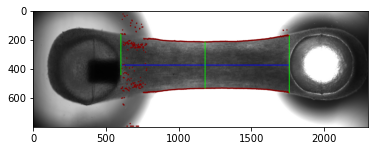


image no: 59 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellA1_Channel   BF  _Seq0078.tif
horizontal inner distance between rois: 1364.4 (microns)
vertical thickness at inner edge of left ROI : 441.6 (microns)
vertical thickness at midpoint between rois: 385.2 (microns)
vertical thickness at inner edge of right ROI : 458.4 (microns)
area between rois: 417543.6 (microns)


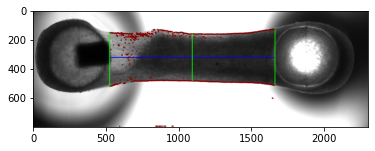


image no: 60 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellA2_Channel   BF  _Seq0067.tif
horizontal inner distance between rois: 1464.0 (microns)
vertical thickness at inner edge of left ROI : 538.8 (microns)
vertical thickness at midpoint between rois: 391.2 (microns)
vertical thickness at inner edge of right ROI : 466.8 (microns)
area between rois: 432907.2 (microns)


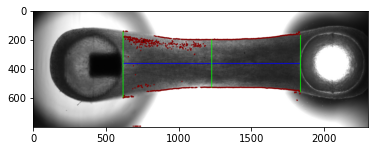


image no: 61 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellB1_Channel   BF  _Seq0057.tif
horizontal inner distance between rois: 1394.4 (microns)
vertical thickness at inner edge of left ROI : 486.0 (microns)
vertical thickness at midpoint between rois: 360.0 (microns)
vertical thickness at inner edge of right ROI : 458.4 (microns)
area between rois: 439165.2 (microns)


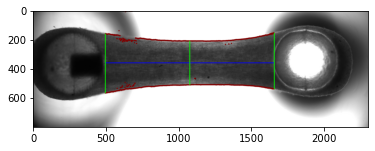


image no: 62 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellB2_Channel   BF  _Seq0080.tif
horizontal inner distance between rois: 104.4 (microns)
vertical thickness at inner edge of left ROI : 408.0 (microns)
vertical thickness at midpoint between rois: 433.2 (microns)
vertical thickness at inner edge of right ROI : 434.4 (microns)
area between rois: 35386.8 (microns)


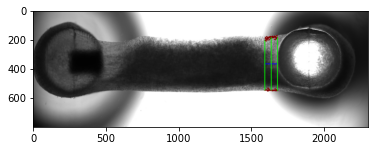


image no: 63 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellA4_Channel   BF  _Seq0084.tif
horizontal inner distance between rois: 168.0 (microns)
vertical thickness at inner edge of left ROI : 406.8 (microns)
vertical thickness at midpoint between rois: 432.0 (microns)
vertical thickness at inner edge of right ROI : 452.4 (microns)
area between rois: 60273.6 (microns)


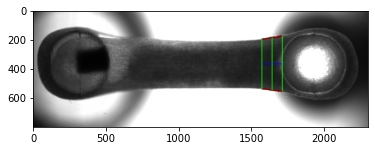


image no: 64 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellC6_Channel   BF  _Seq0077.tif
horizontal inner distance between rois: 1382.4 (microns)
vertical thickness at inner edge of left ROI : 524.4 (microns)
vertical thickness at midpoint between rois: 393.6 (microns)
vertical thickness at inner edge of right ROI : 474.0 (microns)
area between rois: 473241.6 (microns)


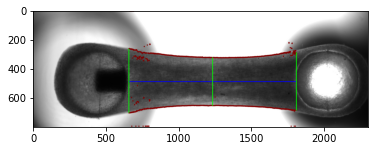


image no: 65 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellA6_Channel   BF  _Seq0087.tif
horizontal inner distance between rois: 55.2 (microns)
vertical thickness at inner edge of left ROI : 454.8 (microns)
vertical thickness at midpoint between rois: 465.6 (microns)
vertical thickness at inner edge of right ROI : 481.2 (microns)
area between rois: 21134.4 (microns)


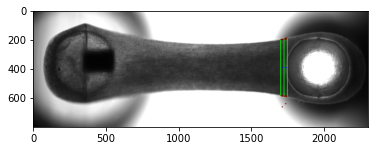


image no: 66 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellB1_Channel   BF  _Seq0081.tif
horizontal inner distance between rois: 1326.0 (microns)
vertical thickness at inner edge of left ROI : 369.6 (microns)
vertical thickness at midpoint between rois: 405.6 (microns)
vertical thickness at inner edge of right ROI : 477.6 (microns)
area between rois: 382672.8 (microns)


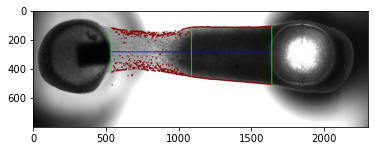


image no: 67 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellC2_Channel   BF  _Seq0083.tif
horizontal inner distance between rois: 1354.8 (microns)
vertical thickness at inner edge of left ROI : 514.8 (microns)
vertical thickness at midpoint between rois: 374.4 (microns)
vertical thickness at inner edge of right ROI : 466.8 (microns)
area between rois: 445742.4 (microns)


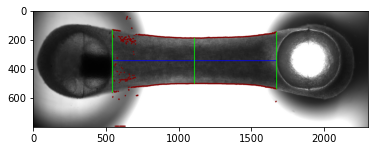


image no: 68 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellC4_Channel   BF  _Seq0086.tif
horizontal inner distance between rois: 241.2 (microns)
vertical thickness at inner edge of left ROI : 367.2 (microns)
vertical thickness at midpoint between rois: 367.2 (microns)
vertical thickness at inner edge of right ROI : 115.2 (microns)
area between rois: 73876.8 (microns)


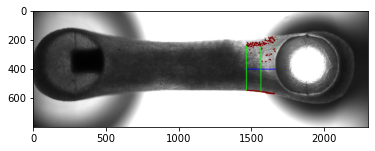


image no: 69 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellA2_Channel   BF  _Seq0091.tif
horizontal inner distance between rois: 64.8 (microns)
vertical thickness at inner edge of left ROI : 444.0 (microns)
vertical thickness at midpoint between rois: 459.6 (microns)
vertical thickness at inner edge of right ROI : 471.6 (microns)
area between rois: 21794.4 (microns)


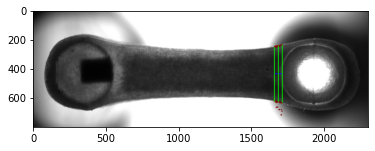


image no: 70 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellA6_Channel   BF  _Seq0099.tif
horizontal inner distance between rois: 214.8 (microns)
vertical thickness at inner edge of left ROI : 411.6 (microns)
vertical thickness at midpoint between rois: 429.6 (microns)
vertical thickness at inner edge of right ROI : 584.4 (microns)
area between rois: 77986.8 (microns)


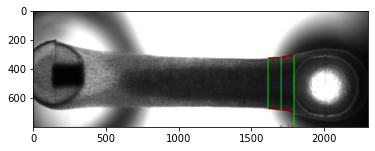


image no: 71 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_001_WellA4_Channel   BF  _Seq0003.tif
horizontal inner distance between rois: 379.2 (microns)
vertical thickness at inner edge of left ROI : 348.0 (microns)
vertical thickness at midpoint between rois: 390.0 (microns)
vertical thickness at inner edge of right ROI : 466.8 (microns)
area between rois: 125691.6 (microns)


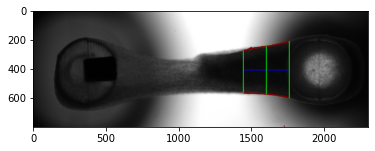


image no: 72 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellA4_Channel   BF  _Seq0096.tif
horizontal inner distance between rois: 123.6 (microns)
vertical thickness at inner edge of left ROI : 411.6 (microns)
vertical thickness at midpoint between rois: 427.2 (microns)
vertical thickness at inner edge of right ROI : 452.4 (microns)
area between rois: 44206.8 (microns)


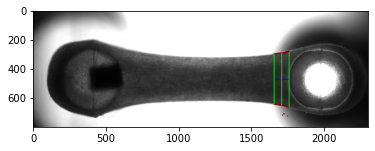


image no: 73 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellB1_Channel   BF  _Seq0069.tif
horizontal inner distance between rois: 1456.8 (microns)
vertical thickness at inner edge of left ROI : 483.6 (microns)
vertical thickness at midpoint between rois: 393.6 (microns)
vertical thickness at inner edge of right ROI : 1.2 (microns)
area between rois: 448401.6 (microns)


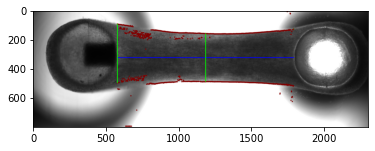


image no: 74 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellA1_Channel   BF  _Seq0054.tif
horizontal inner distance between rois: 1464.0 (microns)
vertical thickness at inner edge of left ROI : 518.4 (microns)
vertical thickness at midpoint between rois: 360.0 (microns)
vertical thickness at inner edge of right ROI : 483.6 (microns)
area between rois: 489891.6 (microns)


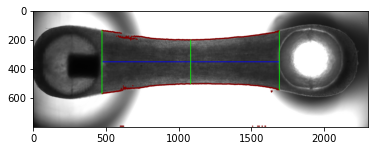


image no: 75 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellB4_Channel   BF  _Seq0097.tif
horizontal inner distance between rois: 178.8 (microns)
vertical thickness at inner edge of left ROI : 397.2 (microns)
vertical thickness at midpoint between rois: 422.4 (microns)
vertical thickness at inner edge of right ROI : 459.6 (microns)
area between rois: 63415.2 (microns)


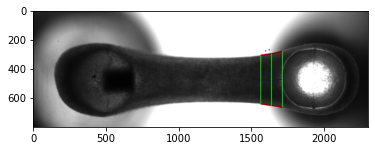


image no: 76 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellB1_Channel   BF  _Seq0093.tif
horizontal inner distance between rois: 138.0 (microns)
vertical thickness at inner edge of left ROI : 446.4 (microns)
vertical thickness at midpoint between rois: 460.8 (microns)
vertical thickness at inner edge of right ROI : 717.6 (microns)
area between rois: 52279.2 (microns)


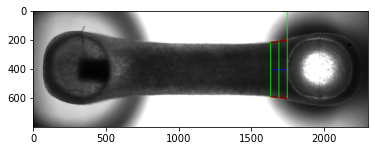


image no: 77 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellA1_Channel   BF  _Seq0090.tif
horizontal inner distance between rois: 172.8 (microns)
vertical thickness at inner edge of left ROI : 411.6 (microns)
vertical thickness at midpoint between rois: 439.2 (microns)
vertical thickness at inner edge of right ROI : 475.2 (microns)
area between rois: 60412.8 (microns)


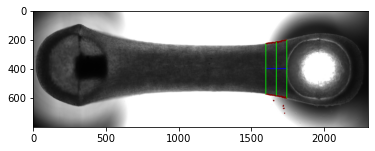


image no: 78 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_002_WellA6_Channel   BF  _Seq0015.tif
horizontal inner distance between rois: 630.0 (microns)
vertical thickness at inner edge of left ROI : 306.0 (microns)
vertical thickness at midpoint between rois: 327.6 (microns)
vertical thickness at inner edge of right ROI : 441.6 (microns)
area between rois: 177265.2 (microns)


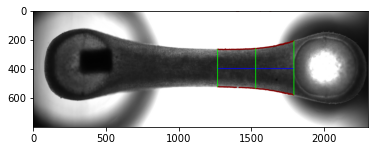


image no: 79 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellC2_Channel   BF  _Seq0095.tif
horizontal inner distance between rois: 860.4 (microns)
vertical thickness at inner edge of left ROI : 397.2 (microns)
vertical thickness at midpoint between rois: 394.8 (microns)
vertical thickness at inner edge of right ROI : 463.2 (microns)
area between rois: 277066.8 (microns)


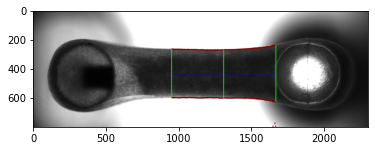


image no: 80 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellA4_Channel   BF  _Seq0060.tif
horizontal inner distance between rois: 1364.4 (microns)
vertical thickness at inner edge of left ROI : 505.2 (microns)
vertical thickness at midpoint between rois: 369.6 (microns)
vertical thickness at inner edge of right ROI : 463.2 (microns)
area between rois: 448173.6 (microns)


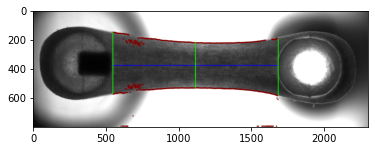


image no: 81 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellB6_Channel   BF  _Seq0088.tif
horizontal inner distance between rois: 64.8 (microns)
vertical thickness at inner edge of left ROI : 452.4 (microns)
vertical thickness at midpoint between rois: 464.4 (microns)
vertical thickness at inner edge of right ROI : 476.4 (microns)
area between rois: 25062.0 (microns)


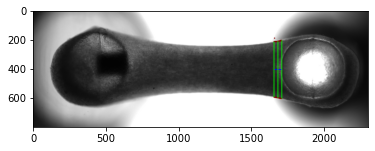


image no: 82 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellC1_Channel   BF  _Seq0094.tif
horizontal inner distance between rois: 171.6 (microns)
vertical thickness at inner edge of left ROI : 426.0 (microns)
vertical thickness at midpoint between rois: 439.2 (microns)
vertical thickness at inner edge of right ROI : 722.4 (microns)
area between rois: 64556.4 (microns)


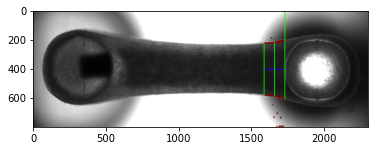


image no: 83 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_007_WellC1_Channel   BF  _Seq0058.tif
horizontal inner distance between rois: 1272.0 (microns)
vertical thickness at inner edge of left ROI : 296.4 (microns)
vertical thickness at midpoint between rois: 352.8 (microns)
vertical thickness at inner edge of right ROI : 447.6 (microns)
area between rois: 403761.6 (microns)


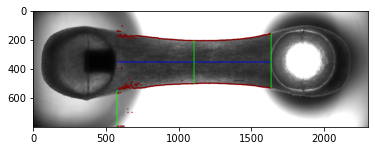


image no: 84 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_006_WellB4_Channel   BF  _Seq0049.tif
horizontal inner distance between rois: 1302.0 (microns)
vertical thickness at inner edge of left ROI : 538.8 (microns)
vertical thickness at midpoint between rois: 518.4 (microns)
vertical thickness at inner edge of right ROI : 550.8 (microns)
area between rois: 560323.2 (microns)


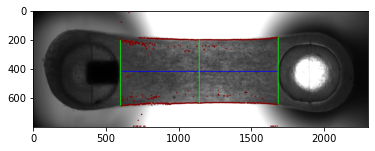


image no: 85 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellC4_Channel   BF  _Seq0074.tif
horizontal inner distance between rois: 1366.8 (microns)
vertical thickness at inner edge of left ROI : 44.4 (microns)
vertical thickness at midpoint between rois: 394.8 (microns)
vertical thickness at inner edge of right ROI : 1.2 (microns)
area between rois: 458614.8 (microns)


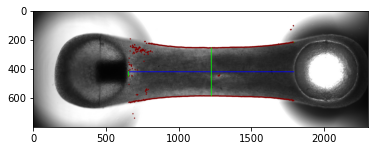


image no: 86 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_008_WellB4_Channel   BF  _Seq0073.tif
horizontal inner distance between rois: 1464.0 (microns)
vertical thickness at inner edge of left ROI : 517.2 (microns)
vertical thickness at midpoint between rois: 375.6 (microns)
vertical thickness at inner edge of right ROI : 400.8 (microns)
area between rois: 464370.0 (microns)


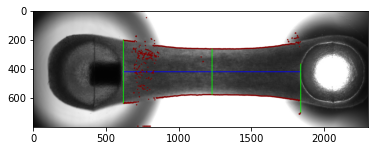


image no: 87 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_010_WellB2_Channel   BF  _Seq0092.tif
horizontal inner distance between rois: 270.0 (microns)
vertical thickness at inner edge of left ROI : 409.2 (microns)
vertical thickness at midpoint between rois: 433.2 (microns)
vertical thickness at inner edge of right ROI : 44.4 (microns)
area between rois: 96710.4 (microns)


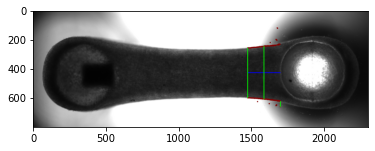


image no: 88 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_009_WellB4_Channel   BF  _Seq0085.tif
horizontal inner distance between rois: 220.8 (microns)
vertical thickness at inner edge of left ROI : 396.0 (microns)
vertical thickness at midpoint between rois: 424.8 (microns)
vertical thickness at inner edge of right ROI : 464.4 (microns)
area between rois: 78332.4 (microns)


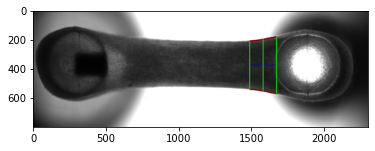


image no: 89 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/Plate2021-09-24_d14_IRD-SkM_Lonza_run9_004_WellA6_Channel   BF  _Seq0033.tif
horizontal inner distance between rois: 1344.0 (microns)
vertical thickness at inner edge of left ROI : 529.2 (microns)
vertical thickness at midpoint between rois: 421.2 (microns)
vertical thickness at inner edge of right ROI : 510.0 (microns)
area between rois: 482989.2 (microns)


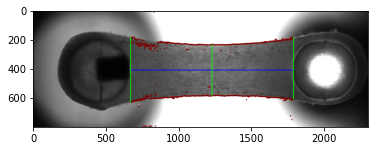

In [1]:
from morphology import computeMorphologyMetrics
import os
from datetime import datetime
from cv2 import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

# search_image_path:            Path to the image morphology metrics are to be computed for.
#                               if search_image_path does not exist, is "" or "select" (case is ignored),
#                               a small window will pop up allowing selection from the file system.
#
# template_image_paths:         A list of 2 paths to templates that will be located in search_image. 
#                               These templates should have inner edges that form vertical end points of
#                               a sub region in search_image that will be analyzed i.e.
#                               the left template should have it's right vertical edge as the
#                               left most point in search_image to consider, and 
#                               the right template should have it's left vertical edge as the 
#                               right most point in search_image to consider.
#                               - If template_image_paths does not exist is None or "select (case is ignored),
#                               a small window will pop up allowing selection from the file system.
#                               - If template_image_paths is "draw", a small window will pop up, and
#                               you can manually select a ROIs. To draw the ROIs, draw the bounding box
#                               for the left most roi and then hit enter, then draw the bounding box for the
#                               right most roi and then hit enter, then hit ESC to complete the selection.
#

# directory_with_images = '../test_data/morphology/failing_edge_detection/'
# template_image_left = directory_with_images + 'template_image_left.tif'
# template_image_right = directory_with_images + 'template_image_right.tif'
# template_image_paths = [template_image_left, template_image_right]

template_image_paths = [
    '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/templates/template_image_1_left.jpg',  
    '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/templates/template_image_1_right.jpg'
]  # 'select'
directory_with_images = '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing_multi_test/'  # 'select'

computeMorphologyMetrics(
    search_image_path=directory_with_images,
    template_image_paths=template_image_paths,
    sub_pixel_search_increment=None,
    sub_pixel_refinement_radius=None,
    microns_per_pixel=1.2
)
